# <div align="center"><ins>Project on Predictive Data Modeling with Portugal 2019 Election Data</ins></div>

<div align="center"><img src="election-img.jpg" width = 100%/></div>

***
**NORKA B5, Group 3**<br>
**Team Members:** *Sruthy Surendran, Heleena Joy, Jebitta Joseph, Gopikrishna Shyam Kumar, Sreehari P S*
***

### <div align="center"> About the Dataset </div>
***

Dataset used in this project describes the evolution of results in the Portuguese Parliamentary Elections of October 6th 2019. The data spans a time interval of 4 hours and 25 minutes, in intervals of 5 minutes, concerning the results of the 21 parties involved in the electoral event. Overall, the dataset contains 21643 records over 28 features (including the target variable). This dataset is a combination of data concerning the overall election and the party voting information which are joined w.r.t the timestamp of data acquisition and the respective district.<br><br>
**Election data columns** = *{'TimeElapsed', 'time', 'territoryName', 'totalMandates', 'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes', 'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage', 'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes', 'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage', 'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters'}*<br>
**Party data columns** = *{'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes'}*
<br>**Column Description:**

|Sno|Column|Type|Description|
|:-|:-|:-|:-|
|1|TimeElapsed |numeric|Time (minutes) passed since the first data acquisition|
|2|time|timestamp|Date and time of the data acquisition|
|3|territoryName|string|Short name of the location (district or nation-wide)|
|4|totalMandates|numeric|MP's elected at the moment|
|5|availableMandates|numeric|MP's left to elect at the moment|
|6|numParishes|numeric|Total number of parishes in this location|
|7|numParishesApproved|numeric|Number of parishes approved in this location|
|8|blankVotes|numeric|Number of blank votes (NOTA)|
|9|blankVotesPercentage|numeric|Percentage of blank votes|
|10|nullVotes|numeric|Number of null votes (Incorrect Info)|
|11|nullVotesPercentage|numeric|Percentage of null votes|
|12|votersPercentage|numeric|Percentage of voters|
|13|subscribedVoters|numeric| Number of subscribed voters in the location|
|14|totalVoters|numeric|Number of votes cast|
|15|pre.blankVotes|numeric|Number of blank votes (previous election)|
|16|pre.blankVotesPercentage|numeric|Percentage of blank votes (previous election)|
|17|pre.nullVotes|numeric|Number of null votes (previous election)|
|18|pre.nullVotesPercentage|numeric|Percentage of null votes (previous election)|
|19|pre.votersPercentage|numeric|Percentage of voters (previous election)|
|20|pre.subscribedVoters|numeric|Number of subscribed voters in the location (previous election)|
|21|pre.totalVoters|numeric|Number of votes cast (previous election)|
|22|Party|string|Political Party|
|23|Mandates|numeric|MP's elected at the moment for the party in a given district|
|24|Percentage|numeric|Percentage of votes in a party|
|25|validVotesPercentage|numeric|Percentage of valid votes in a party|
|26|Votes|numeric|Party votes|
|27|Hondt|numeric|Number of MP's according to the distribution of votes now|
|28|FinalMandates|numeric (Target)|Final number of elected MP's in a territory for a Party|

*Courtesy:*
1. https://archive.ics.uci.edu/ml/datasets/Real-time+Election+Results%3A+Portugal+2019
2. https://www.analyticsvidhya.com/

### About Portugal
>1. Portugal has 20 districts, out of which 2 are autonomous.
2. There are 21 parties which participates in election across districts of portugal.
3. "Território Nacional" refers to portugal as a nation, not a serparate district as others. "Madeira and Açores" are Autonomous regions in Portugal

### Problem Statement
>To apply regression modelling to predict total number of MPs elected from a party under a given region.

***
### <div align="center"> Python Environment Setup </div>
***

In [29]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

***
### <div align="center"> Basic Analysis </div>
***

In [2]:
# Load the dataset to pandas dataframe
ucdata = pd.read_csv("Portugal_Election_Data.csv")

In [3]:
print(f"Shape of uncleaned election dataset is {ucdata.shape}")

Shape of uncleaned election dataset is (21643, 28)


In [4]:
print(f"Columns in uncleaned election dataset are::\n {ucdata.columns.values}")

Columns in uncleaned election dataset are::
 ['TimeElapsed' 'time' 'territoryName' 'totalMandates' 'availableMandates'
 'numParishes' 'numParishesApproved' 'blankVotes' 'blankVotesPercentage'
 'nullVotes' 'nullVotesPercentage' 'votersPercentage' 'subscribedVoters'
 'totalVoters' 'pre.blankVotes' 'pre.blankVotesPercentage' 'pre.nullVotes'
 'pre.nullVotesPercentage' 'pre.votersPercentage' 'pre.subscribedVoters'
 'pre.totalVoters' 'Party' 'Mandates' 'Percentage' 'validVotesPercentage'
 'Votes' 'Hondt' 'FinalMandates']


***
### <div align="center"> Modeling</div>
***

In [5]:
data = pd.read_csv('Processed_Portugal_Election_Data.csv')

In [6]:
data.head(3)

,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,votersPercentage,pre.votersPercentage,Party,Mandates,validVotesPercentage,Votes,Hondt,diff_subscribedVoters,diff_totalVoters,diff_blankVotes,diff_nullVotes,FinalMandates
0,0.982968,-0.36868,6.758472,4.221354,1.405486,-0.128489,-0.380551,1.126269,-0.127891,3.217832,1.419284,14.757327,0.03196,0.021592,0.002177,0.026495,15.259962
1,0.982968,-0.36868,6.758472,4.221354,1.405486,-0.128489,-0.380551,0.799979,-0.127891,2.733495,1.211248,12.691673,0.03196,0.021592,0.002177,0.026495,11.040237
2,0.982968,-0.36868,6.758472,4.221354,1.405486,-0.128489,-0.380551,-1.484053,-0.127891,0.178549,0.112293,2.363404,0.03196,0.021592,0.002177,0.026495,2.600786


In [7]:
data.sort_values(by = 'Hondt', inplace=True)

In [8]:
X = data.drop('FinalMandates', axis =1)
y = pd.DataFrame(data['FinalMandates'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
r2_dict = dict()
def check_metrices(y_pred, model):
    print(f"Performance of {model} Model\n{'_'*50}\n")
    print(f'      MAE =  {mean_absolute_error(y_test, y_pred)}')
    print(f'      MSE =  {mean_squared_error(y_test, y_pred)}')
    r2 = r2_score(y_test, y_pred)
    r2_dict[model] = r2
    print(f' R2_Score =  {r2}')
    print(f'Max Error =  {max_error(y_test, y_pred)}')

In [11]:
def plot_prediction(preds):
    plt.scatter(X_test.Hondt, y_test.FinalMandates)
    plt.plot(X_test.Hondt, preds, 'r--')
    plt.title('Regression Plot')
    plt.xlabel('Hondt')
    plt.ylabel('FinalMandates')
    plt.show()

<div class="alert alert-success"><b>01. Linear Regression</b></div>

Performance of LinearRegression Model
__________________________________________________

      MAE =  0.02692116221091876
      MSE =  0.006914322803711327
 R2_Score =  0.9924306943074878
Max Error =  1.5376811797899457


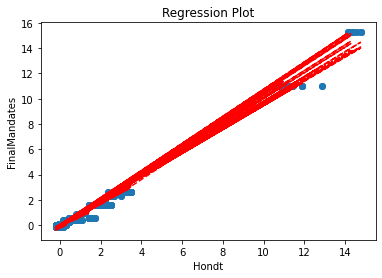

In [12]:
lr_model = LinearRegression().fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
check_metrices(lr_pred, 'LinearRegression')
plot_prediction(lr_pred)

<div class="alert alert-success"><b>02. Random forest Regressor</b></div>

Performance of RandomForest Regressor Model
__________________________________________________

      MAE =  0.0003901571425365412
      MSE =  3.135573046991207e-05
 R2_Score =  0.9999656739906602
Max Error =  0.26191399125042214


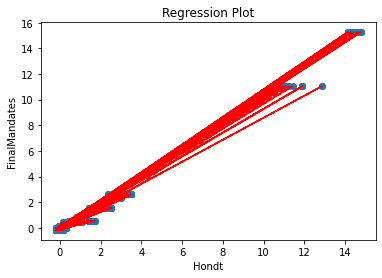

In [13]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
check_metrices(rf_pred, 'RandomForest Regressor')
plot_prediction(rf_pred)

<div class="alert alert-success"><b>03. XGBoost Regressor</b></div>

Performance of XGB Regressor Model
__________________________________________________

      MAE =  0.0007277936829123716
      MSE =  2.0490727218956733e-05
 R2_Score =  0.9999775682185248
Max Error =  0.15234710638172305


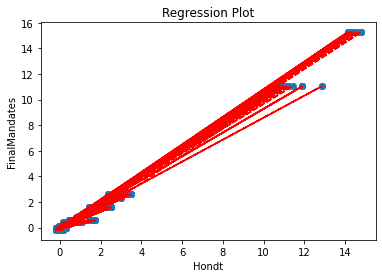

In [14]:
xgb_model = XGBRegressor(random_state=42).fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
check_metrices(xgb_pred, 'XGB Regressor')
plot_prediction(xgb_pred)

<div class="alert alert-success"><b>04. Lasso Regressor</b></div>

Performance of Lasso Regressor Model
__________________________________________________

      MAE =  0.024073466450956687
      MSE =  0.007719544694952314
 R2_Score =  0.9915491950170823
Max Error =  1.4324801386770414


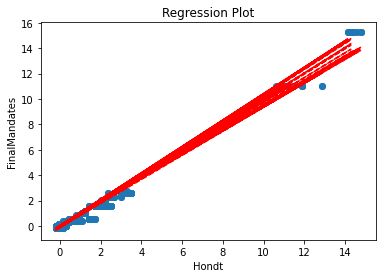

In [15]:
lasso_model = Lasso(random_state=42, alpha = 0.01).fit(X_train, y_train) # With Alpha value = 0.01
lasso_pred = lasso_model.predict(X_test)
check_metrices(lasso_pred, 'Lasso Regressor')
plot_prediction(lasso_pred)

<div class="alert alert-success"><b>05. CatBoost Regressor</b></div>

Performance of CatBoost Regressor Model
__________________________________________________

      MAE =  0.0024204440046390508
      MSE =  6.901762623666964e-05
 R2_Score =  0.9999244444429357
Max Error =  0.3611523307236517


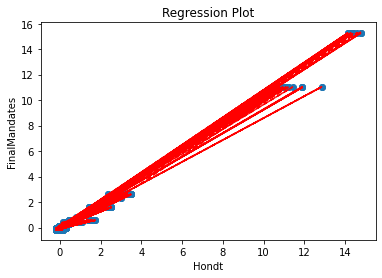

In [16]:
cat_model = CatBoostRegressor(random_state=42, silent=True).fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
check_metrices(cat_pred, 'CatBoost Regressor')
plot_prediction(cat_pred)

<div class="alert alert-success"><b>06. Support Vector Regressor</b></div>

Performance of SV Regressor Model
__________________________________________________

      MAE =  0.0750392031548659
      MSE =  0.011621678598889778
 R2_Score =  0.9872774181257625
Max Error =  1.838747571503058


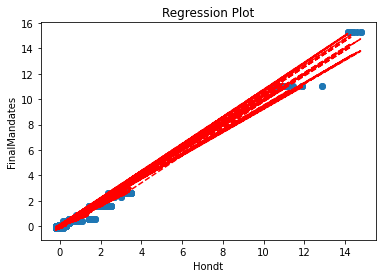

In [17]:
svm_model = SVR(kernel='linear').fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
check_metrices(svm_pred, 'SV Regressor')
plot_prediction(svm_pred)

<div class="alert alert-success"><b>07. DecisionTree Regressor</b></div>

Performance of DecisionTree Regressor Model
__________________________________________________

      MAE =  0.00020168950505649097
      MSE =  3.5869033077406596e-05
 R2_Score =  0.9999607331500184
Max Error =  0.2910155458338022


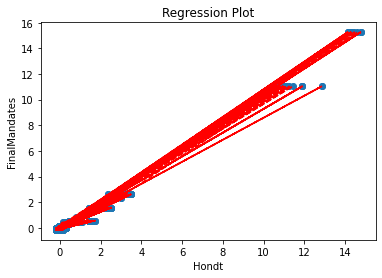

In [18]:
dtr_model = DecisionTreeRegressor(random_state = 42).fit(X_train, y_train)
dtr_pred = dtr_model.predict(X_test)
check_metrices(dtr_pred, 'DecisionTree Regressor')
plot_prediction(dtr_pred)

<div class="alert alert-success"><b>08. KNN Regressor</b></div>

Performance of KNN Regressor Model
__________________________________________________

      MAE =  0.0017121197983753689
      MSE =  0.0009871157902902308
 R2_Score =  0.9989193762885062
Max Error =  1.6878901658360537


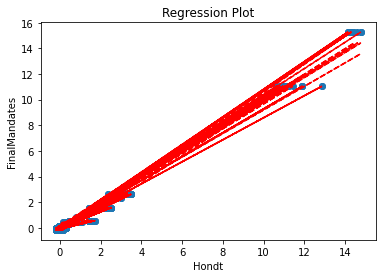

In [19]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
check_metrices(knn_pred, 'KNN Regressor')
plot_prediction(knn_pred)

<div class="alert alert-success"><b>09. AdaBoost Regressor</b></div>

Performance of AdaBoost Regressor Model
__________________________________________________

      MAE =  0.026299121219337862
      MSE =  0.003922827028560995
 R2_Score =  0.9957055697570137
Max Error =  0.58540006987185


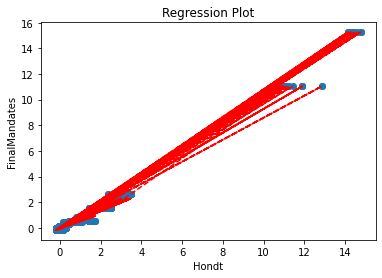

In [20]:
adb_model = AdaBoostRegressor(random_state=42).fit(X_train, y_train)
adb_pred = adb_model.predict(X_test)
check_metrices(adb_pred, 'AdaBoost Regressor')
plot_prediction(adb_pred)

<div class="alert alert-success"><b>10. Ridge Regressor</b></div>

Performance of Ridge Regressor Model
__________________________________________________

      MAE =  0.026927850997481937
      MSE =  0.006914359011114753
 R2_Score =  0.9924306546702141
Max Error =  1.5312952685547856


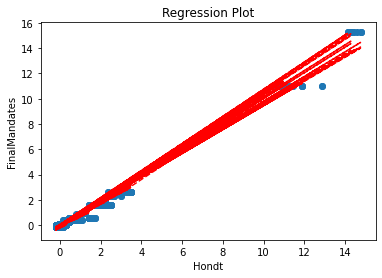

In [21]:
rd_model = Ridge(random_state=42).fit(X_train, y_train)
rd_pred = rd_model.predict(X_test)
check_metrices(rd_pred, 'Ridge Regressor')
plot_prediction(rd_pred)

In [22]:
r2_dict

{'LinearRegression': 0.9924306943074878,
 'RandomForest Regressor': 0.9999656739906602,
 'XGB Regressor': 0.9999775682185248,
 'Lasso Regressor': 0.9915491950170823,
 'CatBoost Regressor': 0.9999244444429357,
 'SV Regressor': 0.9872774181257625,
 'DecisionTree Regressor': 0.9999607331500184,
 'KNN Regressor': 0.9989193762885062,
 'AdaBoost Regressor': 0.9957055697570137,
 'Ridge Regressor': 0.9924306546702141}

In [23]:
best_model = max(r2_dict, key = r2_dict.get)

In [24]:
print(f'Best model is {best_model} with R2_Score of {r2_dict.get(best_model)}')

Best model is XGB Regressor with R2_Score of 0.9999775682185248


#### **Conclusion**
All the 10 models perform well, but it is XGB Regressor that has best performance.

***
### <div align="center"> Hyperparameter Tuning</div>
***

*Hyperparameter Tuning for XGB Regressor*

In [100]:
# Feature importance of default XGB Regressor
pd.Series(xgb_model.feature_importances_, index= X.columns).sort_values(ascending=False)*100

Hondt                    99.107574
Party                     0.671385
numParishes               0.077148
territoryName             0.070886
validVotesPercentage      0.030727
totalMandates             0.015464
Votes                     0.008034
availableMandates         0.003798
diff_totalVoters          0.003449
diff_subscribedVoters     0.002317
diff_nullVotes            0.002255
numParishesApproved       0.002193
pre.votersPercentage      0.002001
votersPercentage          0.001400
diff_blankVotes           0.001057
Mandates                  0.000310
dtype: float32

In [ ]:
xgb_model.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)>

In [93]:
# Tuning Params
params = {
 'learning_rate' : [0.25,0.30, 0.35, 0.4, 0.45, 0.5],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7, 9 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7, 1],
 'num_parallel_tree' : [1, 3, 5, 6, 9, 10],
 'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 15)],
 'random_state' : [36, 42, 48, 54]
}

In [94]:
random_model = RandomizedSearchCV(estimator = XGBRegressor(), param_distributions = params, n_jobs = -1, scoring = 'roc_auc')

In [95]:
random_model.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,...
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.7,
                                                             1],
                                        'gamma': [0.0, 0.1, 0.2, 

In [97]:
random_model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.25, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=242, n_jobs=4,
             num_parallel_tree=10, predictor='auto', random_state=48,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Performance of HyperParameter Tuned XGB Regressor Model
__________________________________________________

      MAE =  0.009987440773905143
      MSE =  0.0024302798608614607
 R2_Score =  0.9973395035627578
Max Error =  2.540088894532346


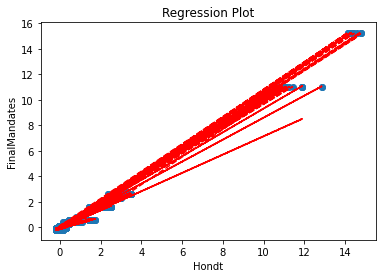

In [98]:
from numpy import nan
best_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.25, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=242, n_jobs=4,
             num_parallel_tree=10, predictor='auto', random_state=48,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None).fit(X_train, y_train)
best_pred = best_model.predict(X_test)
check_metrices(best_pred, 'HyperParameter Tuned XGB Regressor')
plot_prediction(best_pred)

#### **Conclusion:**
Hyperparameter tuning didn't improve from much for the existing model even after multiple tries. So the best set of params are with default one selected by the XGBoost Algorithm.

In [101]:
print(f'Best params for model :: \n {xgb_model.get_params}')

Best params for model :: 
 <bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)>


***